In [26]:
import pandas as pd # Usando o data frame
import numpy as np  # Calculo com matrizes
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random

r = random.Random()
r.seed()

# Aqui vamos fazer uma regressão usando o Pandas/NuPy e scipy.#

In [27]:
# Carrega idade e salário (Varíáveis a serem analisadas)
idade = [18,25,57,45,37,40,24,33]

salario =  [x*15.37 + r.random()*3 + 12 for x in idade]

print (idade)
print (salario)

xData = np.array(idade)
yData = np.array(salario)

[18, 25, 57, 45, 37, 40, 24, 33]
[290.8564003326762, 397.694874579133, 889.9654026997939, 705.1105327590146, 583.5974873587656, 627.933905973935, 383.64404968594886, 521.511279798393]


In [28]:
# define uma função a ser otimizada
def equacaoLinear(x, a, b):
  return a * x + b

In [29]:
# Gera parâmetros iniciais para o otimizador
parametrosIniciais = np.array([1.0, 1.0])

In [30]:
#realiza a otimização através do erro médio quadrado (MSE)
parametrosOtimizados, pcov = curve_fit(equacaoLinear, xData, yData, parametrosIniciais)
# parametrosOtimizados, => Parâmetros ajustados da curva
# pcov => Covariância dos parâmetros
print(parametrosOtimizados)
print(pcov)

[2.01405910e-01 2.76706246e+02]
[[ 1.90757812e-04 -2.58882196e-01]
 [-2.58882196e-01  5.03221140e+02]]


In [31]:
# Modelo encontrado, quero os pontos que ele definiu
yDataModelo = equacaoLinear(xData, *parametrosOtimizados)
print(yDataModelo)

[341.96176068 402.58493965 931.07404798 684.55321391 552.43093683
 598.95570208 392.71605005 496.03728198]


In [32]:
# Encontra o erro absoluto
erroAbs = yDataModelo - yData
print(erroAbs)

[ 51.10536035   4.89006507  41.10864528 -20.55731885 -31.16655053
 -28.97820389   9.07200037 -25.47399782]


In [33]:
#Calcula o erro quadrado de cada medida
SE = np.square(erroAbs)
print("Square Erros : ",SE)

MSE = np.mean(SE)
print("Média dos Erros ao Quadrado : ",MSE)

Square Erros :  [2611.75785667   23.9127364  1689.92071698  422.60335813  971.35387185
  839.73630072   82.30119063  648.92456497]
Média dos Erros ao Quadrado :  911.3138245449909


In [34]:
# Calcula o R^2 ou coeficiente de determinação
RSquare = 1.0 - (np.var(erroAbs) / np.var(yData))
print("coeficiente de determinação (R^2) = ", RSquare)


coeficiente de determinação (R^2) =  0.9725586809792722


In [35]:
#Imprime os coeficientes
print(f"Coeficientes encontrados : {parametrosOtimizados[0]} * X + {parametrosOtimizados[1]}" )

Coeficientes encontrados : 0.2014059101874215 * X + 276.70624578359036


[]

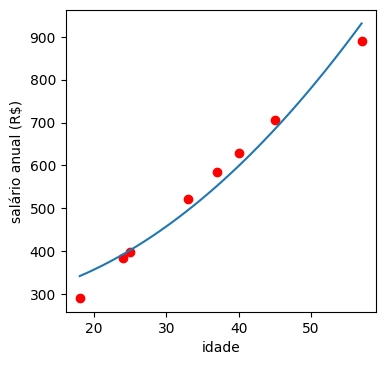

In [36]:
#Imprime os pontos e a curva
f  = plt.figure(figsize=(4,4), dpi=100)
axes = f.add_subplot(111)

## Plot somente dos dados para ajustar
axes.plot(xData, yData, 'ro')

xModelo = np.linspace(min(xData), max(xData))
yModelo = equacaoLinear(xModelo, *parametrosOtimizados)

axes.plot(xModelo, yModelo)
plt.xlabel("idade")
plt.ylabel("salário anual (R$)")
plt.plot()



##Gráfico de resíduos

[]

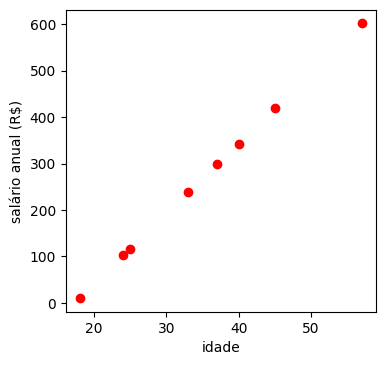

In [37]:
diff  = yData - ( xData * parametrosOtimizados[0] + parametrosOtimizados[1] )
#Imprime os pontos e a curva
f  = plt.figure(figsize=(4,4), dpi=100)
axes = f.add_subplot(111)

## Plot somente dos dados para ajustar
axes.plot(xData, diff, 'ro')

plt.xlabel("idade")
plt.ylabel("salário anual (R$)")
plt.plot()

## Como ficaria a mesma implementação usando o Sklearn

In [38]:
# Importando as bibliotecas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [39]:
reg = LinearRegression()
x_ModeloSkLearn = xData.reshape((-1,1))
regressao = reg.fit(x_ModeloSkLearn, yData)


In [40]:
previsao = reg.predict(x_ModeloSkLearn)
MSE = mean_squared_error(yData, previsao)
print('MSE', MSE)


MSE 0.3288538601124701


In [41]:
#O resultado final para comparacao
print(f"Y = {reg.coef_}*X + {reg.intercept_}")

Y = [15.35452759]*X + 14.55009201990606


In [42]:
# Calculando o exibindo o R^2 (Coef. Determinacao)

R_2 = r2_score(yData, previsao)
print("R^2 = ", R_2)


R^2 =  0.9999900976113348
